In [7]:
import pandas as pd
import seaborn as sns
import math
import zipfile
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import datetime
import zipfile
%matplotlib inline

In [83]:
DAL = pd.read_csv(r"C:\Users\tcern\Downloads\DAL.csv")
KEY = pd.read_csv(r"C:\Users\tcern\Downloads\KEY.csv")
NKE = pd.read_csv(r"C:\Users\tcern\Downloads\NKE.csv")
UNH = pd.read_csv(r"C:\Users\tcern\Downloads\UNH.csv")
ticker_list = [DAL,KEY,NKE,UNH]

In [17]:
for ticker in ticker_list:
 ticker.set_index(["Date"],inplace = True)

In [19]:
DAL

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,44.907,45.608,44.725,45.007,5423200,0.0,0.0
2017-01-04,45.562,46.326,45.471,46.117,7898600,0.0,0.0
2017-01-05,45.853,46.108,45.026,45.235,5806200,0.0,0.0
2017-01-06,45.289,45.753,44.771,45.189,6922700,0.0,0.0
2017-01-09,44.989,45.635,44.953,45.198,5332900,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,32.322,32.657,31.869,32.647,5955600,0.0,0.0
2022-12-27,32.351,32.814,32.086,32.391,7613000,0.0,0.0
2022-12-28,32.332,32.509,31.426,31.495,7687300,0.0,0.0


In [23]:
print(sum(DAL["Open"]==DAL["Close"])==0)
print(sum(KEY["Open"]==KEY["Close"])==0)
print(sum(NKE["Open"]==NKE["Close"])==0)
print(sum(UNH["Open"]==UNH["Close"])==0)

False
False
False
True


In [25]:
UNH

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,143.651,144.667,141.885,143.936,3539700,0.0,0.0
2017-01-04,144.738,144.943,142.411,144.346,2695200,0.0,0.0
2017-01-05,144.203,144.988,143.989,144.587,2961100,0.0,0.0
2017-01-06,144.203,145.264,143.633,144.792,3081300,0.0,0.0
2017-01-09,144.426,144.810,143.339,144.382,3040800,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-23,510.317,517.337,509.149,517.337,1292300,0.0,0.0
2022-12-27,519.888,521.748,515.916,517.999,1596700,0.0,0.0
2022-12-28,520.999,523.998,513.852,514.553,1694200,0.0,0.0


In [87]:
#Even though the calcualtion showed that UNH does have same price at open and close, we can see that it is not true after looking at the dataset

In [27]:
for ticker in ticker_list:
    print(ticker["Close"].max(),ticker["Close"].min())

61.3 18.893
23.297 6.521
171.021 47.039
538.889 140.521


In [29]:
DAL_returns = np.log(DAL["Close"]/DAL["Close"].shift(1))
KEY_returns = np.log(KEY["Close"]/KEY["Close"].shift(1))
NKE_returns = np.log(NKE["Close"]/NKE["Close"].shift(1))
UNH_returns = np.log(UNH["Close"]/UNH["Close"].shift(1))

print("DAL")
print(DAL_returns.describe())
print("KEY")
print(KEY_returns.describe())
print("NKE")
print(NKE_returns.describe())
print("UNH")
print(UNH_returns.describe())

DAL
count    1509.000000
mean       -0.000219
std         0.028231
min        -0.301030
25%        -0.011737
50%         0.000000
75%         0.011263
max         0.190773
Name: Close, dtype: float64
KEY
count    1509.000000
mean        0.000113
std         0.025681
min        -0.242325
25%        -0.010774
50%         0.000514
75%         0.011740
max         0.170254
Name: Close, dtype: float64
NKE
count    1509.000000
mean        0.000579
std         0.019936
min        -0.137060
25%        -0.008353
50%         0.000566
75%         0.010531
max         0.144369
Name: Close, dtype: float64
UNH
count    1509.000000
mean        0.000846
std         0.017561
min        -0.189670
25%        -0.006874
50%         0.001075
75%         0.008545
max         0.120439
Name: Close, dtype: float64


In [41]:
print("Please note that the first date corresponds to the gain and the second date to the loss")
print("DAL highest gain and loss")
print(DAL_returns.idxmax())
print(DAL_returns.idxmin())
print("KEY highest gain and loss")
print(KEY_returns.idxmax())
print(KEY_returns.idxmin())
print("NKE highest gain and loss")
print(NKE_returns.idxmax())
print(NKE_returns.idxmin())
print("UNH highest gain and loss")
print(UNH_returns.idxmax())
print(UNH_returns.idxmin())

Please note that the first date corresponds to the gain and the second date to the loss
DAL highest gain and loss
2020-03-24
2020-03-18
KEY highest gain and loss
2020-11-09
2020-03-16
NKE highest gain and loss
2021-06-25
2022-09-30
UNH highest gain and loss
2020-03-24
2020-03-16


In [47]:
DAL.index = pd.to_datetime(DAL.index)
DAL_res = DAL.resample("W").sum()
print("DAL")
print(round(DAL_res["Volume"].mean(),2))

KEY.index = pd.to_datetime(KEY.index)
KEY_res = KEY.resample("W").sum()
print("KEY")
print(round(KEY_res["Volume"].mean(),2))

NKE.index = pd.to_datetime(NKE.index)
NKE_res = NKE.resample("W").sum()
print("NKE")
print(round(NKE_res["Volume"].mean(),2))

UNH.index = pd.to_datetime(UNH.index)
UNH_res = UNH.resample("W").sum()
print("UNH")
print(round(UNH_res["Volume"].mean(),2))

DAL
61352888.82
KEY
48703048.24
NKE
36081414.38
UNH
16742877.64


In [49]:
DAL_total = np.log(DAL["Close"][-1]/DAL["Close"][0])
print("DAL")
print(DAL_total)

KEY_total = np.log(KEY["Close"][-1]/KEY["Close"][0])
print("KEY")
print(KEY_total)

NKE_total = np.log(NKE["Close"][-1]/NKE["Close"][0])
print("NKE")
print(NKE_total)

UNH_total = np.log(UNH["Close"][-1]/UNH["Close"][0])
print("UNH")
print(UNH_total)

print(max(DAL_total,KEY_total,NKE_total,UNH_total))

DAL
-0.3301731008581359
KEY
0.17042309300234004
NKE
0.8740960247005899
UNH
1.2771972060232673
1.2771972060232673


C:\Users\tcern\AppData\Local\Temp\ipykernel_14104\2110749675.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  DAL_total = np.log(DAL["Close"][-1]/DAL["Close"][0])
C:\Users\tcern\AppData\Local\Temp\ipykernel_14104\2110749675.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  KEY_total = np.log(KEY["Close"][-1]/KEY["Close"][0])
C:\Users\tcern\AppData\Local\Temp\ipykernel_14104\2110749675.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc

In [ ]:
volume_class

DAL is red, KEY is green, NKE is yellow, UNH is blue


<Axes: xlabel='Date'>

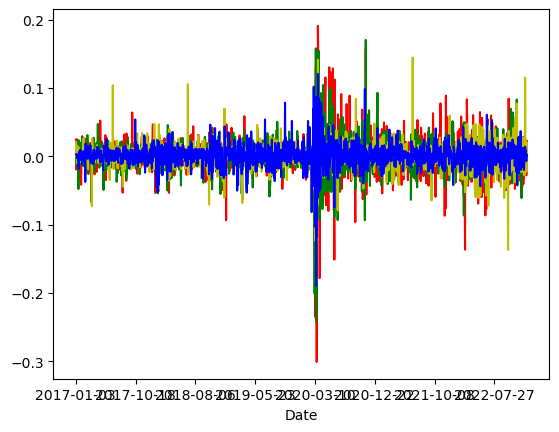

In [79]:
print("DAL is red, KEY is green, NKE is yellow, UNH is blue")
DAL_returns.plot(color = "r")
KEY_returns.plot(color = "g")
NKE_returns.plot(color = "y")
UNH_returns.plot(color = "b")

In [51]:
###part 2###
SP500 = pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")
print(SP500.head())

  Symbol     Security  GICS_Sector                       hq    included  \
0    MMM           3M  Industrials    Saint Paul, Minnesota  09.08.1976   
1    AOS  A. O. Smith  Industrials     Milwaukee, Wisconsin  26.07.2017   
2    ABT       Abbott  Health Care  North Chicago, Illinois  31.03.1964   
3   ABBV       AbbVie  Health Care  North Chicago, Illinois  31.12.2012   
4   ABMD      Abiomed  Health Care   Danvers, Massachusetts  31.05.2018   

       Founded  
0         1902  
1         1916  
2         1888  
3  2013 (1888)  
4         1981  


In [53]:
sum(SP500["included"].isna())

45

In [61]:
SP500["GICS_Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

<Axes: >

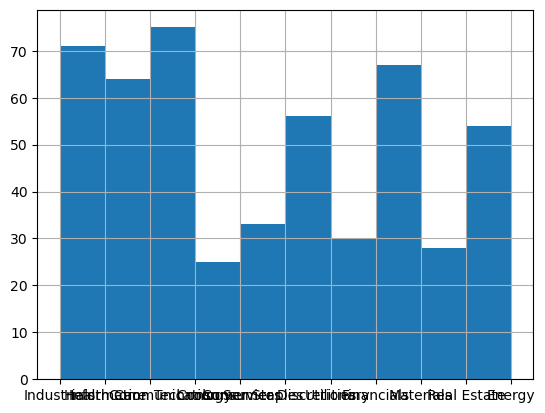

In [67]:
SP500["GICS_Sector"].hist()